<a href="https://colab.research.google.com/github/Vanshikashah318/ImageClassification_CNN/blob/main/Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [ ]:
(train_images, train_labels), (test_images, test_labels)=datasets.cifar10.load_data()
train_images, test_images=train_images/255.0, test_images/255.
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


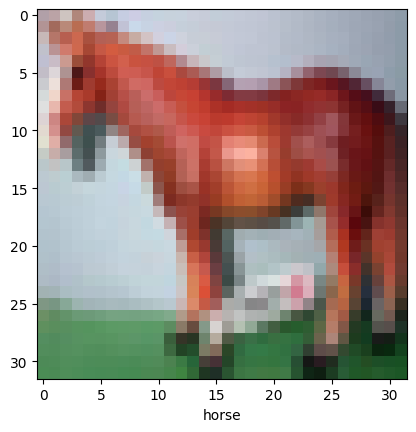

In [ ]:
IMG_INDEX=318
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# CNN model

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 56ms/step - accuracy: 0.7429 - loss: 0.7396 - val_accuracy: 0.7100 - val_loss: 0.8461
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 53ms/step - accuracy: 0.7601 - loss: 0.6807 - val_accuracy: 0.6996 - val_loss: 0.8770
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 56ms/step - accuracy: 0.7727 - loss: 0.6467 - val_accuracy: 0.7077 - val_loss: 0.8614
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.7888 - loss: 0.6081 - val_accuracy: 0.7079 - val_loss: 0.8608
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 58ms/step - accuracy: 0.7984 - loss: 0.5747 - val_accuracy: 0.7164 - val_loss: 0.8626
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 54ms/step - accuracy: 0.8062 - loss: 0.5521 - val_accuracy: 0.7022 - val_loss: 0.9284
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.8174 - loss: 0.5209 - val_accuracy: 0.7060 - val_loss: 0.9199
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
(1, 32, 32, 3)
6
frog


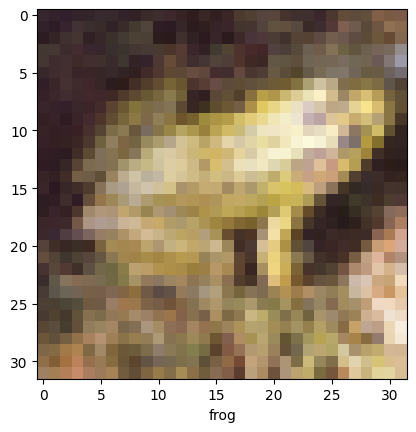

In [52]:
predictions=model.predict(test_images[19:20])
print(test_images[19:20].shape)
print(predictions[0].argmax())
print(class_names[np.argmax(predictions[0])])
plt.imshow(test_images[19])
plt.xlabel(class_names[test_labels[19][0]])
plt.show()


In [53]:
def format_example(image, label=None):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1  # Normalize to [-1, 1] range
    image = tf.image.resize(image, (32, 32))  # Resize to (32, 32)
    return image

Saving ship3.jpg to ship3.jpg
Enter titleship


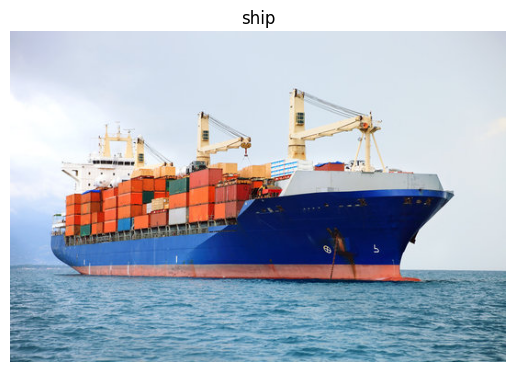

tf.Tensor(
[[[187 191 216]
  [188 192 217]
  [188 192 217]
  ...
  [198 204 218]
  [197 203 217]
  [196 202 216]]

 [[187 191 216]
  [188 192 217]
  [188 192 217]
  ...
  [198 204 218]
  [197 203 217]
  [197 203 217]]

 [[187 191 216]
  [188 192 217]
  [188 192 217]
  ...
  [198 204 218]
  [198 204 218]
  [197 203 217]]

 ...

 [[ 80 115 137]
  [ 75 111 133]
  [ 73 111 132]
  ...
  [ 70 108 119]
  [ 89 125 137]
  [ 99 135 147]]

 [[ 63  98 120]
  [ 69 105 127]
  [ 75 113 134]
  ...
  [ 54  92 105]
  [ 64 102 115]
  [ 62 102 112]]

 [[ 34  70  94]
  [ 35  71  93]
  [ 39  77  98]
  ...
  [108 148 160]
  [103 143 155]
  [ 93 135 147]]], shape=(360, 540, 3), dtype=uint8)


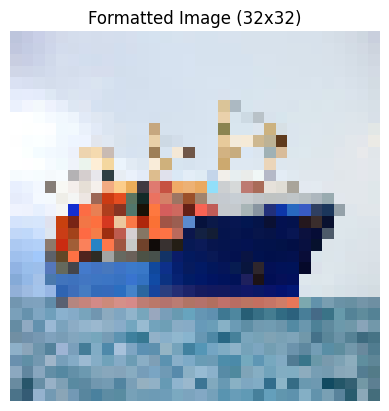

(1, 32, 32, 3)
Formatted image shape: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8
ship


In [57]:
from google.colab import files
from PIL import Image
import numpy as np
uploaded = files.upload()
title=input("Enter title")

# Step 2: Read the uploaded image using PIL and convert it to a Tensor
for fn in uploaded.keys():
    # Open the image
    image = Image.open(fn)

    # Display the original image
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()
    image_array = np.array(image)
    image_tensor = tf.convert_to_tensor(image_array)
    print(image_tensor)
    formatted_image = format_example(image_tensor)

    # Display the formatted image (converted back to NumPy for display)
    formatted_image_np = formatted_image.numpy()  # Convert Tensor to NumPy for plotting
    plt.imshow((formatted_image_np + 1) / 2)  # Convert back from [-1, 1] to [0, 1] for visualization
    plt.axis('off')
    plt.title('Formatted Image (32x32)')
    plt.show()
    formatted_image = tf.expand_dims(formatted_image, axis=0)
    print(formatted_image.shape)

    # Display the processed tensor shape
    print("Formatted image shape:", formatted_image.shape)
    prediction=model.predict([formatted_image])
    print(prediction.argmax())
    print(class_names[np.argmax(prediction)])
